In [ ]:
!pip install geopandas==0.8.2
!pip install --upgrade pyshp

In [2]:
import pandas as pd
import geopandas as gpd

In [ ]:
setor = gpd.read_file('drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/RJ/RJ-SETOR/RJ-SETOR.shp')

In [11]:
setor.head()

,ID1,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODD,NM_DISTRIT,CD_GEOCODS,NM_SUBDIST,CD_GEOCODM,NM_MUNICIP,NM_MESO,NM_MICRO,Cod_setor,Cod_Grande,Nome_Grand,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_me,Cod_micro,Nome_da_mi,Cod_RM,Nome_da_RM,Cod_munici,Nome_do_mu,Cod_distri,Nome_do_di,Cod_subdis,Nome_do_su,Cod_bairro,Nome_do_ba,Situacao_s,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012,geometry
0,401513,330455705070039,URBANO,330455705001,Centro,330455705,RIO DE JANEIRO,330455705,CENTRO,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,330455705070039,3.0,Região Sudeste,RJ,Rio de Janeiro,3306.0,Metropolitana do Rio de Janeiro,33018.0,Rio de Janeiro,19.0,RM Rio de Janeiro,3304557.0,RIO DE JANEIRO,330455705.0,RIO DE JANEIRO,3.304557e+10,CENTRO,3.304557e+09,Centro,1.0,0.0,250.0,611.0,2.44,1.69,2383.23,4.574011e+06,2503.39,4.503521e+06,1656.04,3491502.56,2042.33,3517061.48,"POLYGON ((685.989 7465.269, 686.019 7465.180, ..."
1,401524,330455705070050,URBANO,330455705001,Centro,330455705,RIO DE JANEIRO,330455705,CENTRO,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,330455705070050,3.0,Região Sudeste,RJ,Rio de Janeiro,3306.0,Metropolitana do Rio de Janeiro,33018.0,Rio de Janeiro,19.0,RM Rio de Janeiro,3304557.0,RIO DE JANEIRO,330455705.0,RIO DE JANEIRO,3.304557e+10,CENTRO,3.304557e+09,Centro,1.0,0.0,185.0,505.0,2.73,1.89,3217.34,1.037942e+07,3696.94,1.015218e+07,1912.09,7339555.12,2890.22,8270174.20,"POLYGON ((685.966 7464.729, 685.962 7464.730, ..."
2,401525,330455705070051,URBANO,330455705001,Centro,330455705,RIO DE JANEIRO,330455705,CENTRO,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,330455705070051,3.0,Região Sudeste,RJ,Rio de Janeiro,3306.0,Metropolitana do Rio de Janeiro,33018.0,Rio de Janeiro,19.0,RM Rio de Janeiro,3304557.0,RIO DE JANEIRO,330455705.0,RIO DE JANEIRO,3.304557e+10,CENTRO,3.304557e+09,Centro,1.0,0.0,254.0,546.0,2.15,1.59,2442.10,1.420675e+08,2756.86,1.595885e+08,1656.36,72171991.93,2150.73,92702234.69,"POLYGON ((685.986 7464.775, 685.987 7464.821, ..."
3,401526,330455705070052,URBANO,330455705001,Centro,330455705,RIO DE JANEIRO,330455705,CENTRO,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,330455705070052,3.0,Região Sudeste,RJ,Rio de Janeiro,3306.0,Metropolitana do Rio de Janeiro,33018.0,Rio de Janeiro,19.0,RM Rio de Janeiro,3304557.0,RIO DE JANEIRO,330455705.0,RIO DE JANEIRO,3.304557e+10,CENTRO,3.304557e+09,Centro,1.0,0.0,307.0,646.0,2.10,1.45,2017.45,4.179407e+06,2071.42,4.179418e+06,1451.33,2928898.45,1699.73,3008131.57,"POLYGON ((685.993 7464.871, 685.993 7464.887, ..."
4,401527,330455705070053,URBANO,330455705001,Centro,330455705,RIO DE JANEIRO,330455705,CENTRO,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,330455705070053,3.0,Região Sudeste,RJ,Rio de Janeiro,3306.0,Metropolitana do Rio de Janeiro,33018.0,Rio de Janeiro,19.0,RM Rio de Janeiro,3304557.0,RIO DE JANEIRO,330455705.0,RIO DE JANEIRO,3.304557e+10,CENTRO,3.304557e+09,Centro,1.0,0.0,137.0,319.0,2.33,1.12,1737.15,1.626919e+06,1830.69,1.542633e+06,1146.89,1439373.47,1542.91,1324853.33,"POLYGON ((686.006 7464.872, 686.006 7464.829, ..."


In [6]:
geo_dados = gpd.read_file('drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/RJ/DATASET/DATASET.shp')

In [12]:
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,Dist_Metro,Dist_Trans,Dist_Praia,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,15.622939,0.443193,1.14,POINT (657.514 7453.832)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,7.530741,3.642787,7.48,POINT (670.524 7461.803)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,0.736973,0.641470,6.24,POINT (674.345 7469.440)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,10.718039,0.422370,3.40,POINT (662.701 7457.284)
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,17.131159,0.214605,1.37,POINT (656.019 7453.574)


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:49: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


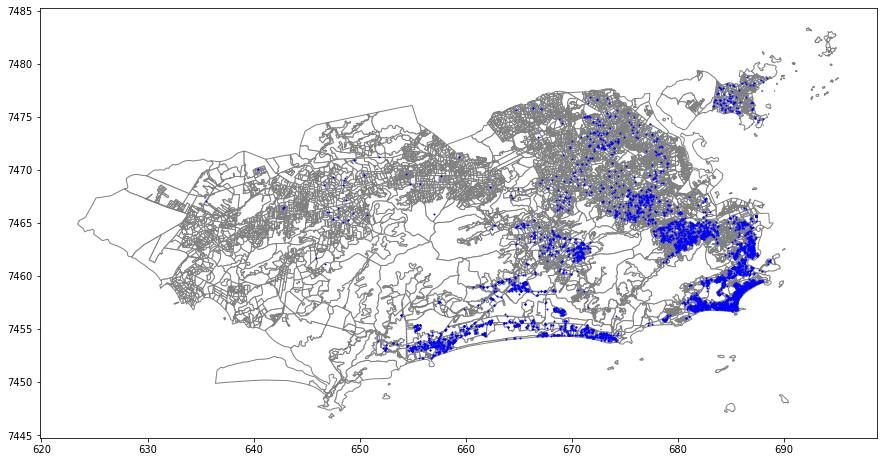

In [8]:
base = setor.plot(color='white', edgecolor='grey', figsize=(15,8))
geo_dados.plot(ax = base, color='blue', markersize=1)

In [9]:
geo_dados.shape

(4513, 17)

In [ ]:
!pip install rtree

In [ ]:
!pip install pygeos

In [ ]:
geo_dados = gpd.sjoin(geo_dados, setor, how ='left', op = 'within')

In [41]:
geo_dados = pd.merge(geo_dados, setor, how='left')

In [42]:
~geo_dados.index.duplicated(keep='first')

array([ True,  True,  True, ...,  True,  True,  True])

In [43]:
geo_dados = geo_dados[~geo_dados.index.duplicated(keep='first')]

In [44]:
geo_dados.shape

(4513, 63)

In [45]:
geo_dados.to_file('drive/MyDrive/Colab Notebooks/Python 16 - Geopandas pt1/RJ/DATASET/DATASET.shp')